In [66]:


import time
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import time

%matplotlib inline

from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import State
from pgmpy.sampling import BayesianModelSampling
from pgmpy.sampling import GibbsSampling
import networkx as nx

In [67]:
updated_df = pd.read_csv('corona_tested_individuals_ver_0083.english.csv')
df_test = pd.read_csv('corona_tested_individuals_ver_006.english.csv',na_values="None")

In [68]:
df_test['age_60_and_above'].fillna('No', inplace=True)
updated_df['age_60_and_above'].fillna('No', inplace=True)

In [69]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'updated_df' with a column 'gender' containing null values

# Filter the DataFrame to get the indices of null gender values
null_indices = updated_df[updated_df['gender'].isnull()].index

# Calculate the number of null records and the desired half records
null_records = len(null_indices)
half_null_records = null_records // 2

# Generate an array of "male" and "female" values with equal length to half of the null records
gender_values = np.repeat(["male", "female"], [half_null_records, half_null_records])

# If there are remaining null records, assign them randomly between "male" and "female"
remaining_records = null_records % 2
if remaining_records > 0:
    random_indices = np.random.choice(2, size=remaining_records)
    random_gender = np.array(["male", "female"])[random_indices]
    gender_values = np.concatenate([gender_values, random_gender])

# Shuffle the gender values to distribute them randomly
np.random.shuffle(gender_values)

# Assign the generated gender values to the null values in the DataFrame
updated_df.loc[null_indices, 'gender'] = gender_values

# Print a sample of the resulting DataFrame



In [70]:
    cleanup_nums = {"corona_result":                                         {"other": 2, "negative": 0, "positive": 1},
          
                    "age_60_and_above":                                      {"Yes": 1, "No": 0 },
                  
                    "gender":                                                {"male": 1, "female": 0 },
                    "test_indication":                                       {"Contact with confirmed": 1, "Abroad": 2, "Other": 3},}

In [71]:
updated_df1=updated_df.replace(cleanup_nums)
df_test=df_test.replace(cleanup_nums)

In [72]:
updated_df1

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,0,0,1,3
1,2020-11-12,0,1,0,0,0,0,0,1,3
2,2020-11-12,0,0,0,0,0,0,1,0,3
3,2020-11-12,0,0,0,0,0,0,0,1,3
4,2020-11-12,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,0,0,0,3
2742592,2020-03-11,0,0,0,0,0,0,0,0,3
2742593,2020-03-11,0,0,0,0,0,2,0,1,3
2742594,2020-03-11,0,0,0,0,0,0,0,0,3


In [73]:
print(updated_df1.isnull().sum())

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64


In [75]:
column_names = updated_df1.columns.tolist()
print(column_names)

['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result', 'age_60_and_above', 'gender', 'test_indication']


In [76]:
mixed_type_columns = []

for col in updated_df1.columns:
    if len(updated_df[col].apply(type).unique()) > 1:
        mixed_type_columns.append(col)

print("Columns with mixed data types:", mixed_type_columns)

Columns with mixed data types: []


In [77]:
architecture= [("test_date", "corona_result"),
                   
                      
                       ("cough", "corona_result"),
                       ("fever", "corona_result"),
                    
                       ("sore_throat", "corona_result"),
                       ("shortness_of_breath", "corona_result"),
                       ("head_ache", "corona_result"),
                       ("age_60_and_above", "corona_result"),
                       ("test_indication", "corona_result"),
                       ("gender", "corona_result")]

In [78]:
model = BayesianModel(architecture)

In [79]:
nodes = list(model.nodes())
edges = list(model.edges())

print('The nodes of the net are: {}'.format(nodes))
print('The edges of the net are: {}'.format(edges))

The nodes of the net are: ['test_date', 'corona_result', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'test_indication', 'gender']
The edges of the net are: [('test_date', 'corona_result'), ('cough', 'corona_result'), ('fever', 'corona_result'), ('sore_throat', 'corona_result'), ('shortness_of_breath', 'corona_result'), ('head_ache', 'corona_result'), ('age_60_and_above', 'corona_result'), ('test_indication', 'corona_result'), ('gender', 'corona_result')]


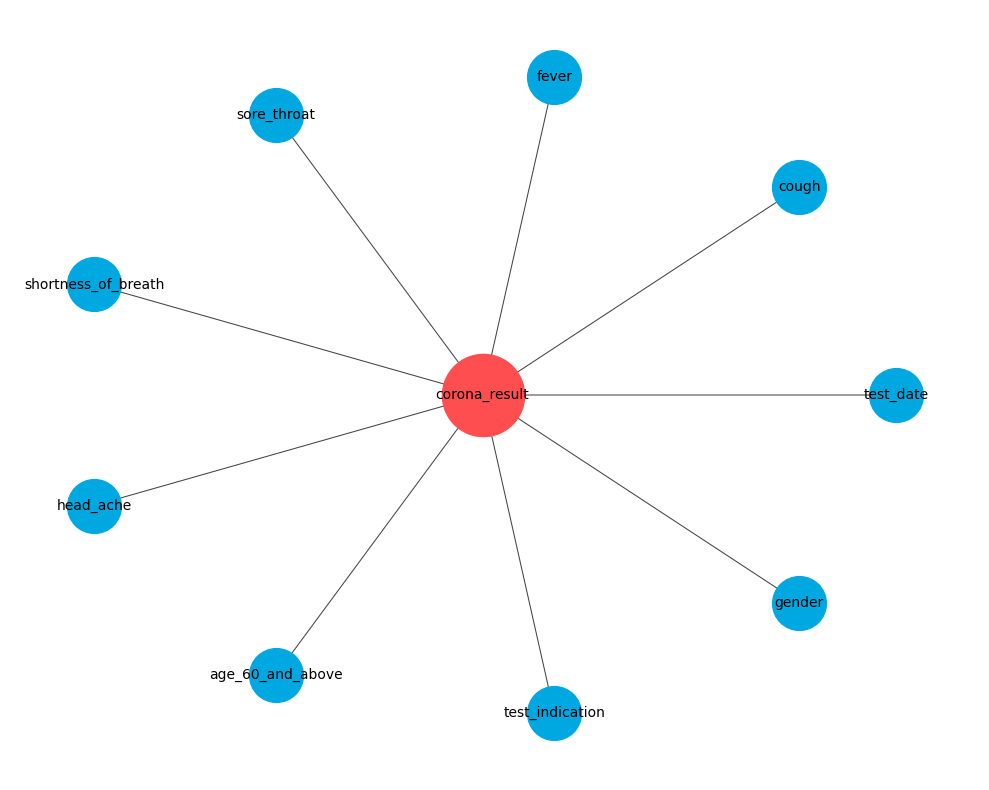

In [80]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the architecture of the Bayesian Network
architecture= [("test_date", "corona_result"),
                   
                      
                       ("cough", "corona_result"),
                       ("fever", "corona_result"),
                    
                       ("sore_throat", "corona_result"),
                       ("shortness_of_breath", "corona_result"),
                       ("head_ache", "corona_result"),
                       ("age_60_and_above", "corona_result"),
                       ("test_indication", "corona_result"),
                       ("gender", "corona_result")]

# Create a directed graph and add edges
DAG = nx.DiGraph()
DAG.add_edges_from(architecture)

# Define node positions and layout
symptom_nodes = [node for node in DAG.nodes if node != 'corona_result']
pos = nx.circular_layout(symptom_nodes)

# Set the position of the disease node at the center
pos['corona_result'] = (0, 0)

# Render the graph using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

# Draw symptom nodes with a vibrant turquoise color
nx.draw_networkx_nodes(DAG, pos, nodelist=symptom_nodes, node_color='#00A8E1', node_size=1500)

# Draw disease node in a bright red color with larger size
nx.draw_networkx_nodes(DAG, pos, nodelist=['corona_result'], node_color='#FF4E50', node_size=3500)

nx.draw_networkx_labels(DAG, pos, font_size=10, font_color='black')

# Draw edges with a darker gray color and smaller width
nx.draw_networkx_edges(DAG, pos, edge_color='#444444', width=0.75, arrows=True)


plt.axis('off')
plt.tight_layout()

plt.show()


In [81]:
from IPython.core.display import display, HTML

# disable text wrapping in output cell
display(HTML(""))

model.cpds = []
model.fit(  data=updated_df1
          , estimator=BayesianEstimator
          , prior_type="BDeu"
          , equivalent_sample_size=10
          ,complete_samples_only=False)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of test_date:
+-----------------------+-------------+
| test_date(2020-03-11) | 0.0001331   |
+-----------------------+-------------+
| test_date(2020-03-12) | 0.000231911 |
+-----------------------+-------------+
| test_date(2020-03-13) | 0.000269831 |
+-----------------------+-------------+
| test_date(2020-03-14) | 0.000266914 |
+-----------------------+-------------+
| test_date(2020-03-15) | 0.000405469 |
+-----------------------+-------------+
| test_date(2020-03-16) | 0.00053272  |
+-----------------------+-------------+
| test_date(2020-03-17) | 0.000559337 |
+-----------------------+-------------+
| test_date(2020-03-18) | 0.000763887 |
+-----------------------+-------------+
| test_date(2020-03-19) | 0.000828789 |
+-----------------------+-------------+
| test_date(2020-03-20) | 0.000696433 |
+-----------------------+-------------+
| test_date(2020-03-21) | 0.00064174  |
+-----------------------+-------------+
| test_date(2020-03-22) | 0.00131446  |
+--

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [82]:
from pgmpy.inference import VariableElimination
infer =VariableElimination(model)

In [83]:
BMS_inference = BayesianModelSampling(model)
GS_inference = GibbsSampling(model)

C:\Users\Asif\anaconda3\envs\pgmv1\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:519: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"


In [84]:
import pickle

# Assuming you have already created BMS_inference and GS_inference

# Save the inference results
with open('bms_inference.pkl', 'wb') as f:
    pickle.dump(BMS_inference, f)

with open('gs_inference.pkl', 'wb') as f:
    pickle.dump(GS_inference, f)



In [85]:
import pickle

# Load the inference results
with open('bms_inference.pkl', 'rb') as f:
    BMS_inference_loaded = pickle.load(f)

with open('gs_inference.pkl', 'rb') as f:
    GS_inference_loaded = pickle.load(f)


In [86]:
def show_active_trail(model, start, end, evidences={}, trail_to_show=[]):

  str_evidences = "| " if len(evidences) > 0 else  ""
  for evidence, value in evidences.items():
    str_evidences += evidence +"="+str(value)
    if evidence != list(evidences.keys())[-1]:  # check wheter it is last
      str_evidences += ", "
  
  title_inference = "P( {} {})".format(end, str_evidences)

  # prepare figure
  fig = plt.figure(figsize=(15,5))
  ax1, ax2 = fig.subplots(nrows=1, ncols=2)

  # compute query
  inference = VariableElimination(model)
  query = inference.query(variables=[end]
                        , evidence=evidences
                        ,show_progress=False
                        )
  
  probabilities = ["{:.4}%".format(value) for value in query.values]
  table = np.column_stack((query.state_names[query.variables[0]], probabilities))

  # plot inference 
  font_size=14
  bbox=[0, 0, 1, 0.60]
  mpl_table = ax1.table(cellText = table
                      , bbox=bbox
                      , cellLoc='center'
                      , colLabels=query.variables+[ "P({} | .. )".format(end)]
                      , colWidths=[1.5, 2]
                      , loc = 'center'
                      , colColours=['#d9d9d9','#d9d9d9'])
  mpl_table.auto_set_font_size(False)
  mpl_table.set_fontsize(font_size)
  ax1.axis('off')
  ax1.set_title(title_inference)
  
  # check if there is an active trail
  obs = list(evidences.keys()).copy()
  if start in list(evidences.keys()):
    obs.remove(start)
  active = model.is_active_trail(start=start, end=end, observed=obs)
  title_graph = "ACTIVE TRAIL ({} -> {}): {}".format(start, end, active)

  edges = list(model.in_edges(trail_to_show))
  trail_edges = edges.copy() 

  # remove unuseful edge
  edges = list(model.in_edges(trail_to_show))
  trail_edges = edges.copy()

  for edge in edges:
    if not all(node in trail_to_show for node in edge):
      trail_edges.remove(edge)

  # plot graph 
  nx.draw_networkx_edges(DAG, pos, edge_color='gray', width = 2.0, arrows=True, ax=ax2)
  nx.draw_networkx_nodes(DAG, pos, nodelist = nodes, node_color='white', edgecolors='grey', ax=ax2)
  nx.draw_networkx_edges(DAG, pos, edgelist=trail_edges, edge_color='black', width = 2.0, arrows=True, ax=ax2)
  nx.draw_networkx_nodes(DAG, pos, nodelist=[start, end], node_color='red',  edgecolors='grey', ax=ax2)
  nx.draw_networkx_nodes(DAG, pos, nodelist=list(evidences.keys()), node_color='yellow', edgecolors='grey', ax=ax2)
  nx.draw_networkx_labels(DAG, pos, ax=ax2)
  
  ax2.set_title(title_graph) 

  plt.show()

CAUSAL REASONING:



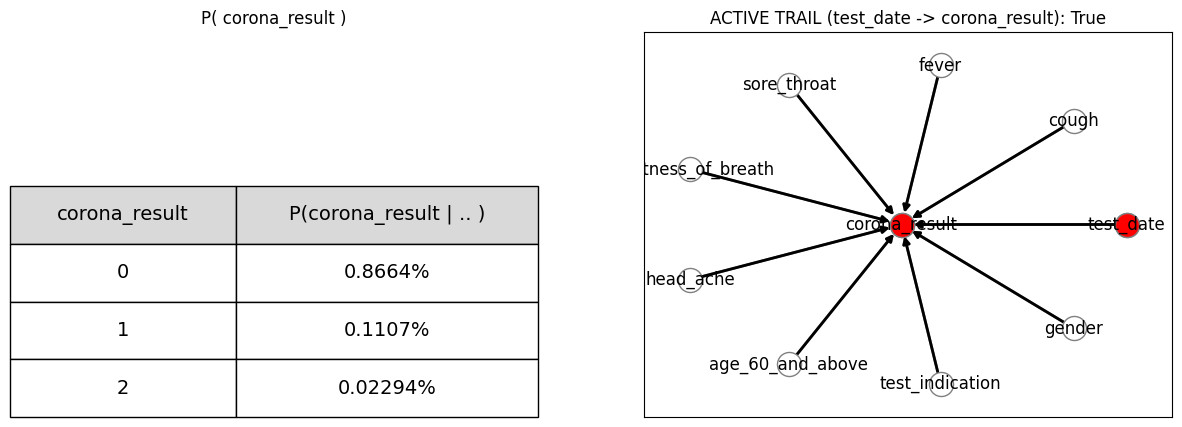


-------------------------------------------------------------------------------------------------------------

CAUSAL REASONING:



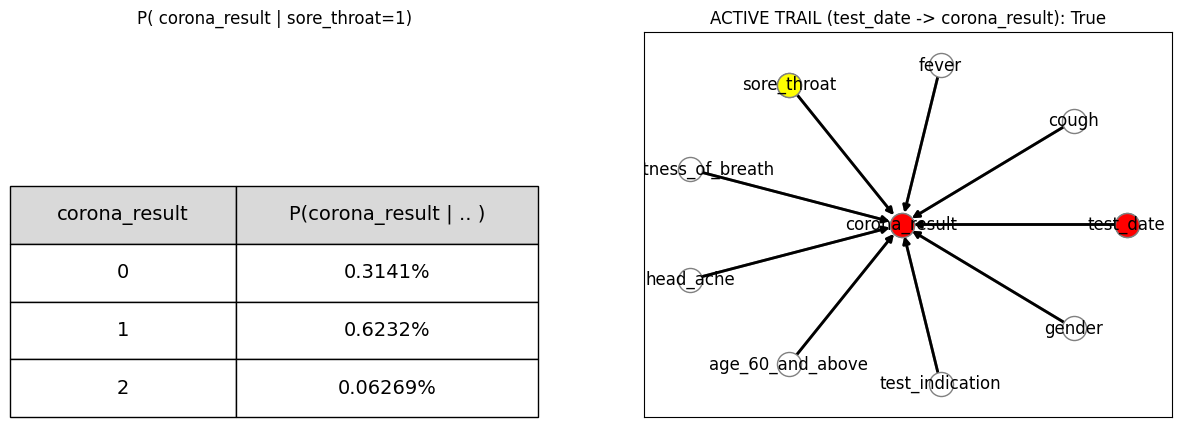

In [90]:
# Causal reasoning
print("CAUSAL REASONING:\n")

show_active_trail(model
                  , start='test_date'
                  , end='corona_result'
                  #, evidences={'starter': True}
                  , trail_to_show=['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result', 'age_60_and_above', 'gender', 'test_indication'])

print("\n-------------------------------------------------------------------------------------------------------------\n")

# Causal reasoning
print("CAUSAL REASONING:\n")

show_active_trail(model
                  , start='test_date'
                  , end='corona_result'
                  ,evidences={'sore_throat':1}
                  , trail_to_show=['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result', 'age_60_and_above', 'gender', 'test_indication'])

In [87]:
column_names = updated_df1.columns.tolist()
print(column_names)

['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result', 'age_60_and_above', 'gender', 'test_indication']


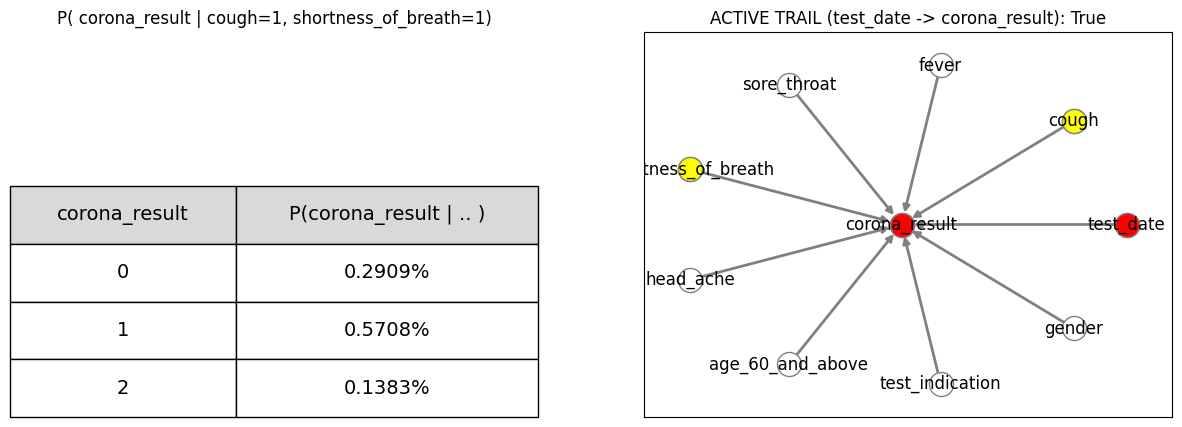


-------------------------------------------------------------------------------------------------------------



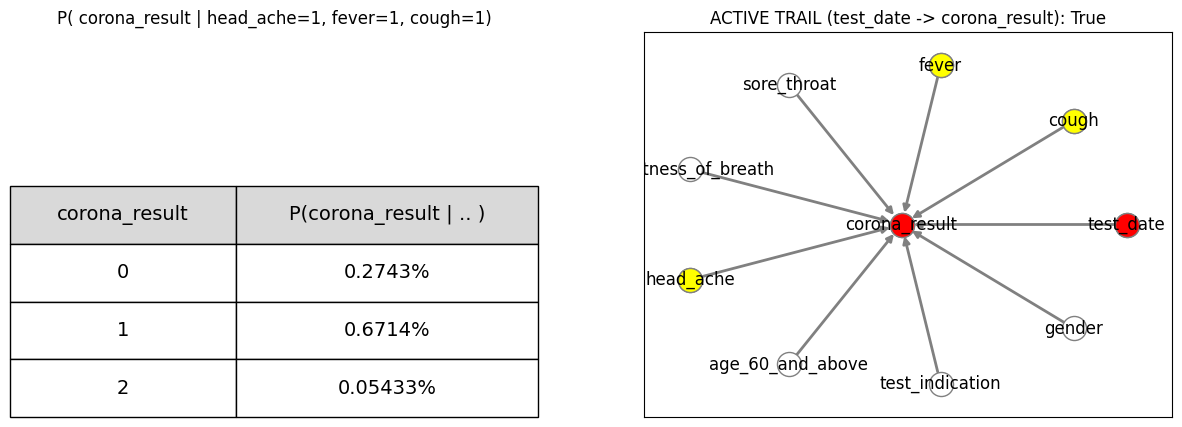

In [91]:

#Active trail broken by penalty_kicker and starter with respect to available
show_active_trail(model
                  , start='test_date'
                  , end='corona_result'
                  , evidences={'cough':1,'shortness_of_breath': 1}
                  , trail_to_show=[])

print("\n-------------------------------------------------------------------------------------------------------------\n")

show_active_trail(model
                  , start='test_date'
                  , end='corona_result'
                  , evidences={'head_ache':1,'fever':1,'cough': 1}
                  , trail_to_show=[])

In [92]:

# Show indipendence between nausea and prognosis

# Show probability distributions
print(" P(corona result|nausea=True)")
inference = VariableElimination(model)
print(inference.query(['corona_result']
                      ,{'fever': 1},
                      show_progress=False))

print("\n")

print(" P(corona result)")
print(inference.query(['fever']
                      ,{},
                      show_progress=False))

print("\n")

# Show graph with the absence of an active trail
print("Active trail between fever and corona reuslt: {}".format(model.is_active_trail('fever','corona result')))


 P(corona result|nausea=True)
+------------------+----------------------+
| corona_result    |   phi(corona_result) |
+==================+======================+
| corona_result(0) |               0.5076 |
+------------------+----------------------+
| corona_result(1) |               0.4666 |
+------------------+----------------------+
| corona_result(2) |               0.0259 |
+------------------+----------------------+


 P(corona result)
+----------+--------------+
| fever    |   phi(fever) |
+==========+==============+
| fever(0) |       0.9646 |
+----------+--------------+
| fever(1) |       0.0354 |
+----------+--------------+


Active trail between fever and corona reuslt: False


In [95]:

import time

from IPython.core.display import display, HTML
def compare_query(model,variables, evidence, title):
   # showing query with different elimination order
   inference = VariableElimination(model)
   heuristics = ['MinFill', 'MinNeighbors','MinWeight','WeightedMinFill']
   ordering = []
   execution_time = []
   print("{}\n".format(title))
   for heuristic in heuristics:
     print("\nElimination order: {}".format(heuristic))
     start = time.time()
     print(inference.query(variables=variables, 
                      evidence=evidence, 
                      elimination_order=heuristic,
                      show_progress=False))
     execution_time.append("{:.3f} s".format(time.time() - start))
     ordering.append(inference._get_elimination_order(variables=variables, 
                                        evidence=evidence, 
                                        elimination_order=heuristic,
                                        show_progress=False))
   d = {'Heuristic':heuristics, 'Order':ordering, 'Time':execution_time}
   df = pd.DataFrame(data=d)
   return df
     

In [96]:
df = compare_query(model, ['corona_result'], {'head_ache': 1}, 'P(corona_result|head_ache=True)')
display(HTML(df.to_html()))

P(corona_result|head_ache=True)


Elimination order: MinFill
+------------------+----------------------+
| corona_result    |   phi(corona_result) |
+==================+======================+
| corona_result(0) |               0.3085 |
+------------------+----------------------+
| corona_result(1) |               0.6562 |
+------------------+----------------------+
| corona_result(2) |               0.0353 |
+------------------+----------------------+

Elimination order: MinNeighbors
+------------------+----------------------+
| corona_result    |   phi(corona_result) |
+==================+======================+
| corona_result(0) |               0.3085 |
+------------------+----------------------+
| corona_result(1) |               0.6562 |
+------------------+----------------------+
| corona_result(2) |               0.0353 |
+------------------+----------------------+

Elimination order: MinWeight
+------------------+----------------------+
| corona_result    |   phi(corona_result

,Heuristic,Order,Time
0,MinFill,"[fever, gender, cough, sore_throat, test_date, test_indication, age_60_and_above, shortness_of_breath]",1.516 s
1,MinNeighbors,"[fever, gender, cough, sore_throat, test_date, test_indication, age_60_and_above, shortness_of_breath]",1.577 s
2,MinWeight,"[test_date, test_indication, fever, gender, cough, sore_throat, age_60_and_above, shortness_of_breath]",2.584 s
3,WeightedMinFill,"[test_date, test_indication, fever, gender, cough, sore_throat, age_60_and_above, shortness_of_breath]",1.382 s


In [93]:
column_names = updated_df1.columns.tolist()
print(column_names)

['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result', 'age_60_and_above', 'gender', 'test_indication']


In [97]:
#Dictionary of the discrete value to let the method access at CPTs
dict={True:1,False:0,
      '0-15':0,'16-45':1,'46-90':2,
      '1':0,'2':1,'3':2,'4':3,'5':4,
      'sv':0,'<=5':1,'5.5-6.5':2,'7-9.5':3,'>=10':4}

def discretization(x,value):
  '''
  Function that helps to discretize for the likelihood weighting and rejection sampling
  x     : unknown variable
  value : value to analize for the unknown variabile based on the value of the query variable
  '''
  if(x == dict[value]):
    return 1
  else:
    return 0

def prob_LW(samples,variable,query_value):
  '''
  Function that calculate the likelihood weighting probability
  samples     : sample from which extract the probability value
  variable    : variable of the query
  query_value : value of the query variable
  '''
  discretize = np.vectorize(discretization)
  samples_thresholded = discretize(samples[variable],query_value)
  return round(np.sum(np.dot(samples_thresholded,samples['_weight']))/np.sum(samples['_weight']),2)

def prob_RS(samples,variable,query_value):
  '''
  Function that calculate the rejection sampling probability
  samples     : sample from which extract the probability value
  variable    : variable of the query
  query_value : value of the query variable
  '''
  discretize = np.vectorize(discretization)
  samples_rejection = discretize(samples[variable],query_value)
  return np.recarray.mean(samples_rejection, axis=0)

def get_state_index(var, var_val):
  '''
  Funcion that return the index of a given value for a variable
  '''
  return inference.query([var], show_progress=False).state_names.get(var).index(var_val)

def prob_GS(samples, query_variable, query_evidence, query_value):
  """
  Computes the probability of Gibbs Sampling given the samples
  it will call a pgmpy query function building the string for the requested query
  """
  gs_query = ""
  for evidence, value in query_evidence.items():
    gs_query += evidence + " == " + str(get_state_index(evidence, value))
    if evidence != list(query_evidence.keys())[-1]:
      # add the '&' except fot the last element
      gs_query += " & "

  # check denominator to avoid division by 0
  if samples.query(gs_query).shape[0] == 0:
    return 0.0
  else:
    return (samples.query(query_variable[0] + " == " + str(get_state_index(query_variable[0], query_value)) + " & " + gs_query).shape[0] 
          / samples.query(gs_query).shape[0])



# Function to calculate Total Variation Distance
def total_variation_distance(p, q):
    """
    Computes the Total Variation Distance between two probability distributions.
    p: numpy array representing the true distribution
    q: numpy array representing the approximated distribution
    """
    return 0.5 * np.sum(np.abs(p - q))

# Function to calculate Kullback-Leibler divergence
def kl_divergence(p, q):
    """
    Computes the Kullback-Leibler divergence between two probability distributions.
    p: numpy array representing the true distribution
    q: numpy array representing the approximated distribution
    """
    epsilon = 1e-10  # Small epsilon value to avoid zero probabilities
    kl_divergence = np.sum(np.where(p != 0, p * np.log(p / (q + epsilon)), 0))
    return kl_divergence



# Function to calculate Hellinger Distance
def hellinger_distance(p, q):
    """
    Computes the Hellinger Distance between two probability distributions.
    p: numpy array representing the true distribution
    q: numpy array representing the approximated distribution
    """
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / np.sqrt(2)


# Function to calculate Jensen-Shannon Divergence
def jensen_shannon_divergence(p, q):
    """
    Computes the Jensen-Shannon Divergence between two probability distributions.
    p: numpy array representing the true distribution
    q: numpy array representing the approximated distribution
    """
    m = 0.5 * (p + q)
    return 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))

def query_preprocessing(query_variable,query_evidence,query_value):
  '''
  Function that return the processed query variable,evidence in order to adapt them at the methods
  of likelihood weighting and rejection sampling

  query_var:     : list with one unknown variable of the query
  query_evidence : dict representing the evidence of the query
  query_value:   : value of the query var to find in the query
  '''
  

  query = inference.query(query_variable,query_evidence,show_progress=False)
  evidence = []

  for (evidence_var, evidence_value) in query_evidence.items():
    state = State(evidence_var,evidence_value)
    evidence.append(state)

  query_prob= query.values[dict[query_value]]
  variables = query_variable[0]

  return query_prob,evidence,variables


def run_experiment(sample_size, query_variable, query_evidence, query_value):
    '''
    Function that return the result of a sampling experiment using likelihood weighting,
    rejection sampling and Gibbs sampling

    sample_size    : size of the sample for the experiment
    query_variable : list with one unknown variable of the query
    query_evidence : dict representing the evidence of the query
    query_value:   : value of the query var to find in the query
    '''

    # Rounding precision
    precision = 3

    # Preprocessing for the LW and RS methods

    query_prob, evidence, variable = query_preprocessing(query_variable, query_evidence, query_value)

    t0_LW = time.time()
    samples_LW = BMS_inference_loaded.likelihood_weighted_sample(evidence=evidence, size=sample_size, return_type='recarray')
    approx_prob_LW = prob_LW(samples_LW, variable, query_value)
    time_LW = round(time.time() - t0_LW, precision)

    t0_RS = time.time()
    samples_RS = BMS_inference_loaded.rejection_sample(evidence=evidence, size=sample_size, return_type='recarray', show_progress=False)
    approx_prob_RS = prob_RS(samples_RS, variable, query_value)
    time_RS = round(time.time() - t0_RS, precision)

    t0_GS = time.time()
    samples_GS = GS_inference_loaded.sample(size=sample_size, seed=37)
    approx_prob_GS = prob_GS(samples_GS, query_variable, query_evidence, query_value)
    time_GS = round(time.time() - t0_GS, precision)

    # Calculate true distribution based on the query
    true_distribution = np.array([query_prob, 1 - query_prob])

    # Calculate approximated distributions for each method
    approx_distribution_RS = np.array([1 - approx_prob_RS, approx_prob_RS])
    approx_distribution_LW = np.array([1 - approx_prob_LW, approx_prob_LW])
    approx_distribution_GS = np.array([1 - approx_prob_GS, approx_prob_GS])

    # Calculate KL divergences
    kl_RS = kl_divergence(true_distribution, approx_distribution_RS)
    kl_LW = kl_divergence(true_distribution, approx_distribution_LW)
    kl_GS = kl_divergence(true_distribution, approx_distribution_GS)

    # Calculate Total Variation Distances
    tv_RS = total_variation_distance(true_distribution, approx_distribution_RS)
    tv_LW = total_variation_distance(true_distribution, approx_distribution_LW)
    tv_GS = total_variation_distance(true_distribution, approx_distribution_GS)

    # Calculate Hellinger Distances
    hd_RS = hellinger_distance(true_distribution, approx_distribution_RS)
    hd_LW = hellinger_distance(true_distribution, approx_distribution_LW)
    hd_GS = hellinger_distance(true_distribution, approx_distribution_GS)

    # Calculate Jensen-Shannon Divergences
    js_RS = jensen_shannon_divergence(true_distribution, approx_distribution_RS)
    js_LW = jensen_shannon_divergence(true_distribution, approx_distribution_LW)
    js_GS = jensen_shannon_divergence(true_distribution, approx_distribution_GS)

    # Return results
    return np.array([(sample_size, query_prob,
                      approx_prob_RS, kl_RS, tv_RS, hd_RS, js_RS, time_RS,
                      approx_prob_LW, kl_LW, tv_LW, hd_LW, js_LW, time_LW,
                      approx_prob_GS, kl_GS, tv_GS, hd_GS, js_GS, time_GS)],
                      dtype=[('sample_size', '<i8'),  ('query_prob', '<f8'),
                             ('approx_prob_RS', '<f8'), ('kl_divergence_RS', '<f8'), ('tv_distance_RS', '<f8'), ('hellinger_distance_RS', '<f8'), ('jensen_shannon_divergence_RS', '<f8'), ('time_RS', '<f8'),
                             ('approx_prob_LW', '<f8'), ('kl_divergence_LW', '<f8'), ('tv_distance_LW', '<f8'), ('hellinger_distance_LW', '<f8'), ('jensen_shannon_divergence_LW', '<f8'), ('time_LW', '<f8'),
                             ('approx_prob_GS', '<f8'), ('kl_divergence_GS', '<f8'), ('tv_distance_GS', '<f8'), ('hellinger_distance_GS', '<f8'), ('jensen_shannon_divergence_GS', '<f8'), ('time_GS', '<f8')])


#Query in approximate inference
def approximate_inference(q, query_var, query_evidence, query_value, starting_size=2.5, final_size=5, experiments=10):  
    '''
    Function that create the result of the different approximate inference methods using
    different sample size values

    query_var:     : list with one unknown variable of the query
    query_evidence : dict representing the evidence of the query
    query_value:   : value of the query var to find in the query
    starting_size=2 : exponent of the number of start sample points that are 10^(starting_size)
    final_size=5    : exponent of the number of final sample points that are 10^(final_size)
    experiments=10 : number of sampling experiments
    '''
    results = np.array([],dtype=[('sample_size', '<i8'), ('query_prob', '<f8'),
                           ('approx_prob_RS', '<f8'),  ('kl_divergence_RS', '<f8'), ('tv_distance_RS', '<f8'), ('hellinger_distance_RS', '<f8'), ('jensen_shannon_divergence_RS', '<f8'), ('time_RS', '<f8'),
                           ('approx_prob_LW', '<f8'),  ('kl_divergence_LW', '<f8'), ('tv_distance_LW', '<f8'), ('hellinger_distance_LW', '<f8'), ('jensen_shannon_divergence_LW', '<f8'), ('time_LW', '<f8'),
                           ('approx_prob_GS', '<f8'),  ('kl_divergence_GS', '<f8'), ('tv_distance_GS', '<f8'), ('hellinger_distance_GS', '<f8'), ('jensen_shannon_divergence_GS', '<f8'), ('time_GS', '<f8')])

    for size in np.logspace(starting_size, final_size, num=experiments, dtype='<i8'):
        results = np.append(results, run_experiment(size, query_var, query_evidence, query_value))

    globals()[f"query{q}"] = pd.DataFrame(results)
    globals()[f"query{q}"].to_csv(f"query{q}" + '.csv')
    # display table
    print("\nResults during sampling:")
    display(pd.DataFrame(results))
    print("\n")
    # show plots
    plot_results(results, query_evidence, query_var, query_value)




In [98]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import time
# Set the desired figure size
figure_width = 15  # You can adjust this value based on your needs
figure_height = 10  # You can adjust this value based on your needs

# Adjust font sizes globally
plt.rcParams.update({'font.size': 14, 'legend.fontsize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12})


def plot_results(results, query_evidence, query_variable, query_value):
    '''
    Function to plot the result of the approximate inference
    '''
    query_prob, evidence, var = query_preprocessing(query_variable, query_evidence, query_value)
    
    plt.figure(figsize=(figure_width, figure_height))  # Set the figure size here
    plt.grid(True)
    plt.title("Approximate probability values", fontsize=16)
    LWCplot, = plt.semilogx(results['sample_size'], results['approx_prob_LW'], 'go--', label="Likelihood Weighting", markersize=8)
    RSCplot, = plt.semilogx(results['sample_size'], results['approx_prob_RS'], 'bo--', label="Rejection Sampling", markersize=8)
    GSCplot, = plt.semilogx(results['sample_size'], results['approx_prob_GS'], 'mo--', label="Gibbs Sampling", markersize=8)
    VECplot, = plt.semilogx(results['sample_size'], query_prob * np.ones(results.size), 'r', label="reference value")
    plt.xlabel("Sample size")
    plt.ylabel("Approximate probability value")
    plt.legend(handles=[LWCplot, RSCplot, GSCplot, VECplot], loc='upper right')
    plt.tight_layout()
    # Save the plot with desired dimensions
    plt.savefig('Approximate_probability_values.png', dpi=300)  # You can adjust the filename and dpi as needed
    plt.show()

    
    plt.figure(figsize=(figure_width, figure_height))  # Set the figure size here
    plt.grid(True)
    plt.title("Trend of KL Divergence", fontsize=16)
    KLRSplot, = plt.semilogx(results['sample_size'], results['kl_divergence_RS'], 'bo--', label="Rejection Sampling", markersize=8)
    KLLWplot, = plt.semilogx(results['sample_size'], results['kl_divergence_LW'], 'go--', label="Likelihood Weighting", markersize=8)
    KLGSplot, = plt.semilogx(results['sample_size'], results['kl_divergence_GS'], 'mo--', label="Gibbs Sampling", markersize=8)
    plt.xlabel("Sample size")
    plt.ylabel("KL Divergence")
    plt.legend(handles=[KLRSplot, KLLWplot, KLGSplot], loc='upper right')
    plt.tight_layout()
    # Save the plot with desired dimensions
    plt.savefig('Trend_of_KL_Divergence.png', dpi=300)  # You can adjust the filename and dpi as needed
    plt.show()

    plt.figure(figsize=(figure_width, figure_height))  # Set the figure size here
    plt.grid(True)
    plt.title("Trend of Total Variation Distance (TV Distance)", fontsize=16)
    TVRSplot, = plt.semilogx(results['sample_size'], results['tv_distance_RS'], 'bo--', label="Rejection Sampling", markersize=8)
    TVLWplot, = plt.semilogx(results['sample_size'], results['tv_distance_LW'], 'go--', label="Likelihood Weighting", markersize=8)
    TVGSplot, = plt.semilogx(results['sample_size'], results['tv_distance_GS'], 'mo--', label="Gibbs Sampling", markersize=8)
    plt.xlabel("Sample size")
    plt.ylabel("Total Variation Distance (TV Distance)")
    plt.legend(handles=[TVRSplot, TVLWplot, TVGSplot], loc='upper right')
    plt.tight_layout()
    # Save the plot with desired dimensions
    plt.savefig('Total_Variation_Distance.png', dpi=300)  # You can adjust the filename and dpi as needed
    plt.show()
    
    plt.figure(figsize=(figure_width, figure_height))  # Set the figure size here
    plt.grid(True)
    plt.title("Trend of Hellinger Distance", fontsize=16)
    HDRSplot, = plt.semilogx(results['sample_size'], results['hellinger_distance_RS'], 'bo--', label="Rejection Sampling", markersize=8)
    HDLWplot, = plt.semilogx(results['sample_size'], results['hellinger_distance_LW'], 'go--', label="Likelihood Weighting", markersize=8)
    HDGSplot, = plt.semilogx(results['sample_size'], results['hellinger_distance_GS'], 'mo--', label="Gibbs Sampling", markersize=8)
    plt.xlabel("Sample size")
    plt.ylabel("Hellinger Distance")
    plt.legend(handles=[HDRSplot, HDLWplot, HDGSplot], loc='upper right')
    plt.tight_layout()
    # Save the plot with desired dimensions
    plt.savefig('Trend_of_Hellinger_Distance.png', dpi=300)  # You can adjust the filename and dpi as needed
    plt.show()
    
    plt.figure(figsize=(figure_width, figure_height))  # Set the figure size here
    plt.grid(True)
    plt.title("Trend of Jensen-Shannon Divergence", fontsize=16)
    JSRSplot, = plt.semilogx(results['sample_size'], results['jensen_shannon_divergence_RS'], 'bo--', label="Rejection Sampling", markersize=8)
    JSLWplot, = plt.semilogx(results['sample_size'], results['jensen_shannon_divergence_LW'], 'go--', label="Likelihood Weighting", markersize=8)
    JSGSplot, = plt.semilogx(results['sample_size'], results['jensen_shannon_divergence_GS'], 'mo--', label="Gibbs Sampling", markersize=8)
    plt.xlabel("Sample size")
    plt.ylabel("Jensen-Shannon Divergence")
    plt.legend(handles=[JSRSplot, JSLWplot, JSGSplot], loc='upper right')
    plt.tight_layout()
    # Save the plot with desired dimensions
    plt.savefig('Trend_of_Jensen_Shannon_Divergence.png', dpi=300)  # You can adjust the filename and dpi as needed
    plt.show()
    

    plt.figure(figsize=(figure_width, figure_height))  # Set the figure size here
    plt.grid(True)
    plt.title("Trend of the sampling time", fontsize=16)
    TLWplot, = plt.semilogx(results['sample_size'], results['time_LW'], 'go--', label="Likelihood Weighting", markersize=8)
    TRSplot, = plt.semilogx(results['sample_size'], results['time_RS'], 'bo--', label="Rejection Sampling", markersize=8)
    TGSplot, = plt.semilogx(results['sample_size'], results['time_GS'], 'mo--', label="Gibbs Sampling", markersize=8)
    plt.xlabel("Sample size")
    plt.ylabel("Seconds")
    plt.legend(handles=[TLWplot, TRSplot, TGSplot], loc='upper right')
    plt.tight_layout()
    # Save the plot with desired dimensions
    plt.savefig('Trend_of_the_sampling_time.png', dpi=300)  # You can adjust the filename and dpi as needed
    plt.show()



P(corona result| fever:True, cough:true)


C:\Users\Asif\anaconda3\envs\pgmv1\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:519: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
100%|███████████████████████████████████████████████████████████████████████████████| 315/315 [00:00<00:00, 906.25it/s]
C:\Users\Asif\anaconda3\envs\pgmv1\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log
C:\Users\Asif\anaconda3\envs\pgmv1\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in multiply
Generating for node: corona_result: 100%|██████████████████████████████████████████████| 10/10 [05:48<00:00, 34.89s/it]


Generating for node: corona_result: 100%|██████████████████████████████████████████████| 10/10 [04:56<00:00, 29.61s/it]


100%|██████████████████████████████████████████████████████████████████████████| 99999/99999 [01:13<00:00, 1353.47it/s]



Results during sampling:


,sample_size,query_prob,approx_prob_RS,kl_divergence_RS,tv_distance_RS,hellinger_distance_RS,jensen_shannon_divergence_RS,time_RS,approx_prob_LW,kl_divergence_LW,tv_distance_LW,hellinger_distance_LW,jensen_shannon_divergence_LW,time_LW,approx_prob_GS,kl_divergence_GS,tv_distance_GS,hellinger_distance_GS,jensen_shannon_divergence_GS,time_GS
0,316,0.4308,0.433544,0.037024,0.135656,0.096146,0.009230,7123.289,0.43,0.039010,0.1392,0.098670,0.009720,258.370,0.0,12.42278,0.5692,0.586214,0.255476,5.956
1,599,0.4308,0.444073,0.031449,0.125127,0.088660,0.007850,8629.231,0.43,0.039010,0.1392,0.098670,0.009720,291.178,0.0,12.42278,0.5692,0.586214,0.255476,4.015
2,1136,0.4308,0.448944,0.029031,0.120257,0.085203,0.007251,9448.055,0.42,0.044911,0.1492,0.105803,0.011173,280.327,0.0,12.42278,0.5692,0.586214,0.255476,3.831
3,2154,0.4308,0.452646,0.027260,0.116554,0.082577,0.006811,7925.098,0.43,0.039010,0.1392,0.098670,0.009720,306.325,0.0,12.42278,0.5692,0.586214,0.255476,4.794
4,4084,0.4308,0.416748,0.046926,0.152452,0.108127,0.011669,11733.171,0.43,0.039010,0.1392,0.098670,0.009720,312.237,0.0,12.42278,0.5692,0.586214,0.255476,5.917
5,7742,0.4308,0.433996,0.036775,0.135204,0.095824,0.009168,13369.253,0.43,0.039010,0.1392,0.098670,0.009720,309.468,0.0,12.42278,0.5692,0.586214,0.255476,11.494
6,14677,0.4308,0.431287,0.038282,0.137913,0.097753,0.009540,14645.885,0.43,0.039010,0.1392,0.098670,0.009720,322.420,0.0,12.42278,0.5692,0.586214,0.255476,14.828
7,27825,0.4308,0.427026,0.040718,0.142174,0.100789,0.010141,20100.604,0.44,0.033549,0.1292,0.091554,0.008370,326.117,0.0,12.42278,0.5692,0.586214,0.255476,24.478
8,52749,0.4308,0.430700,0.038613,0.138500,0.098171,0.009622,16679.573,0.43,0.039010,0.1392,0.098670,0.009720,298.608,0.0,12.42278,0.5692,0.586214,0.255476,43.427
9,100000,0.4308,0.429250,0.039437,0.139950,0.099204,0.009825,19955.487,0.43,0.039010,0.1392,0.098670,0.009720,301.059,0.0,12.42278,0.5692,0.586214,0.255476,77.051


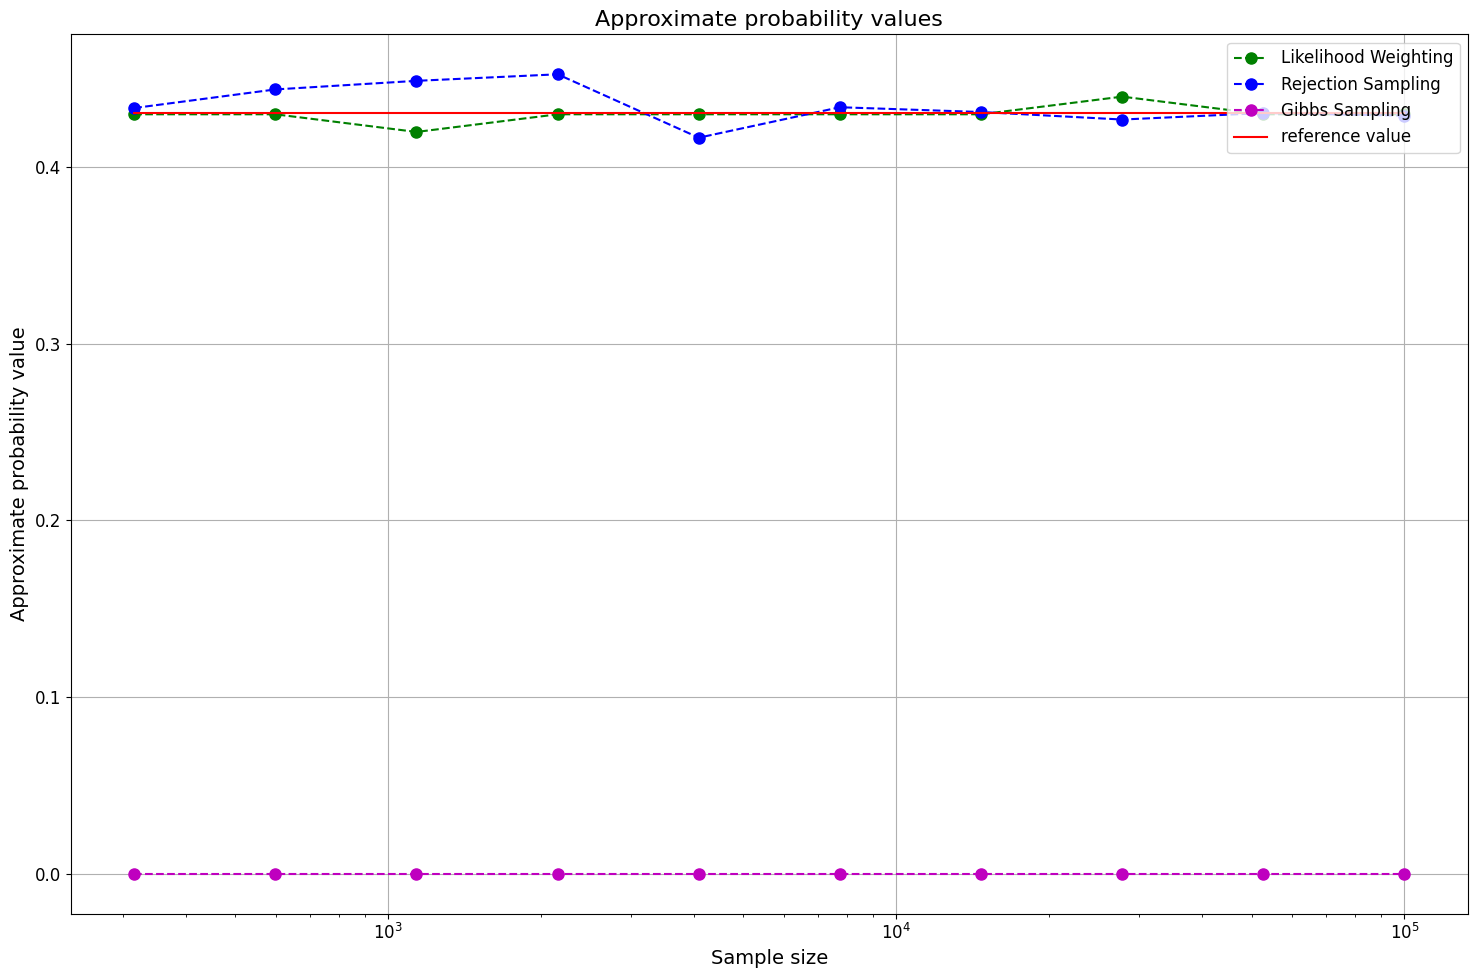

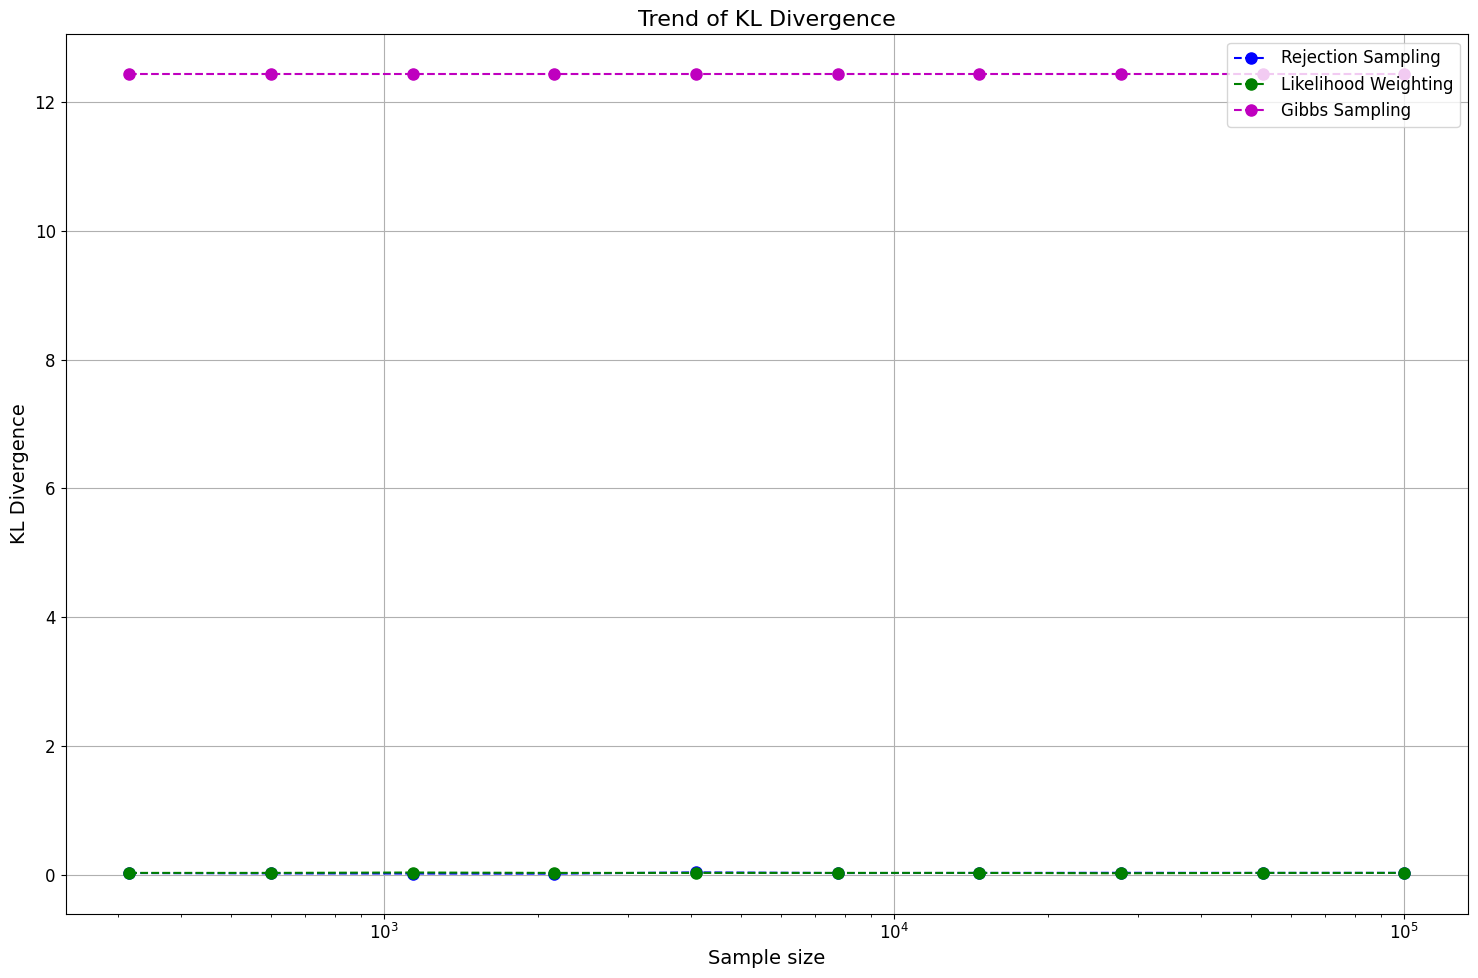

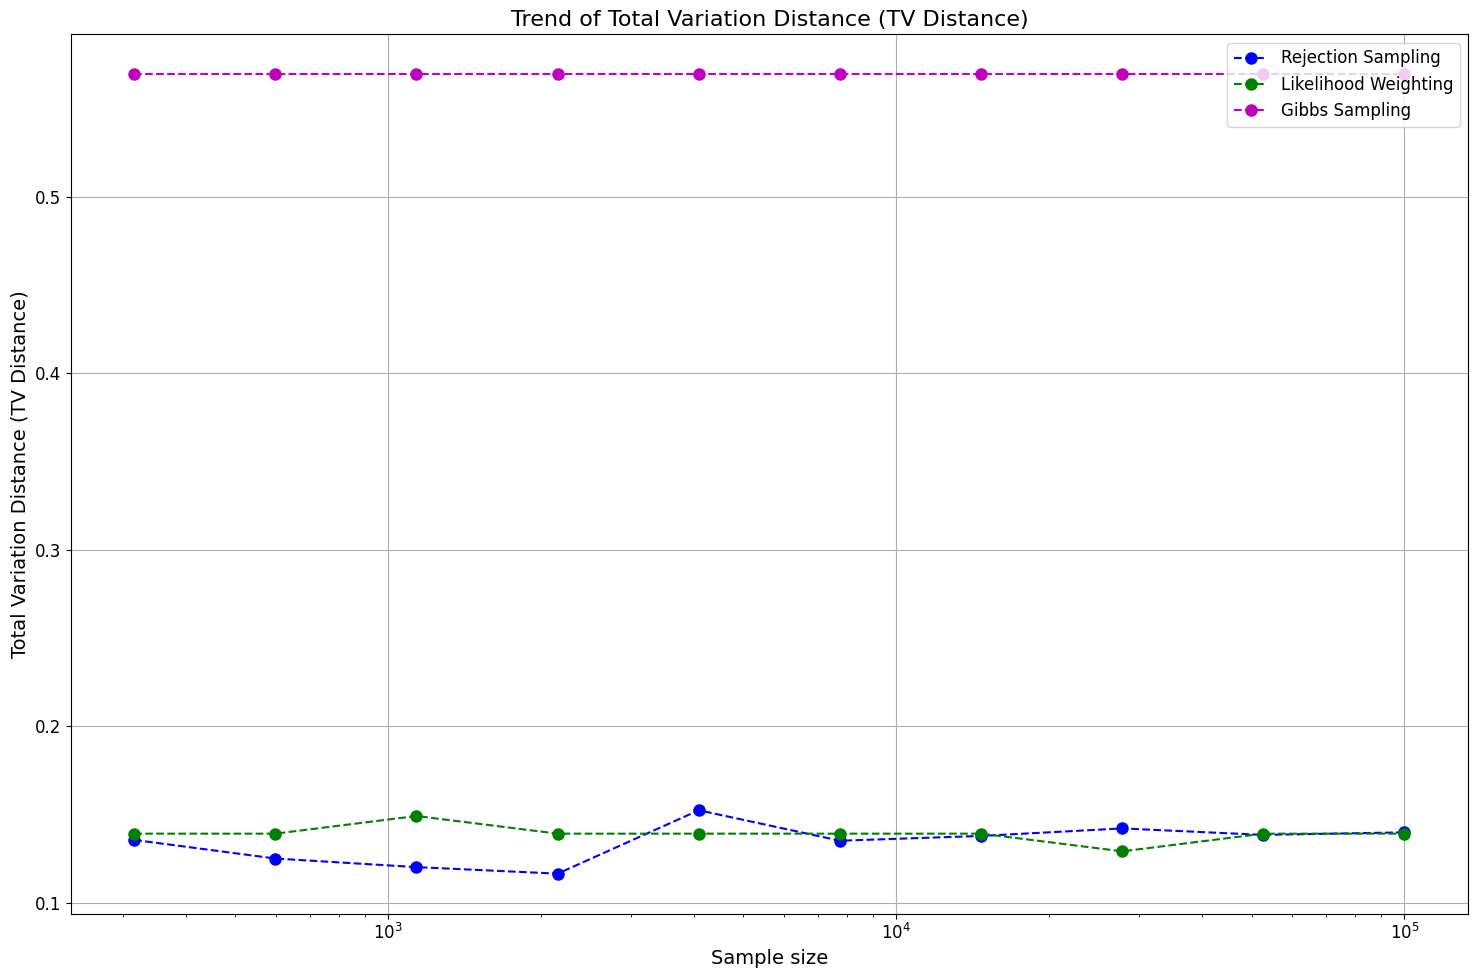

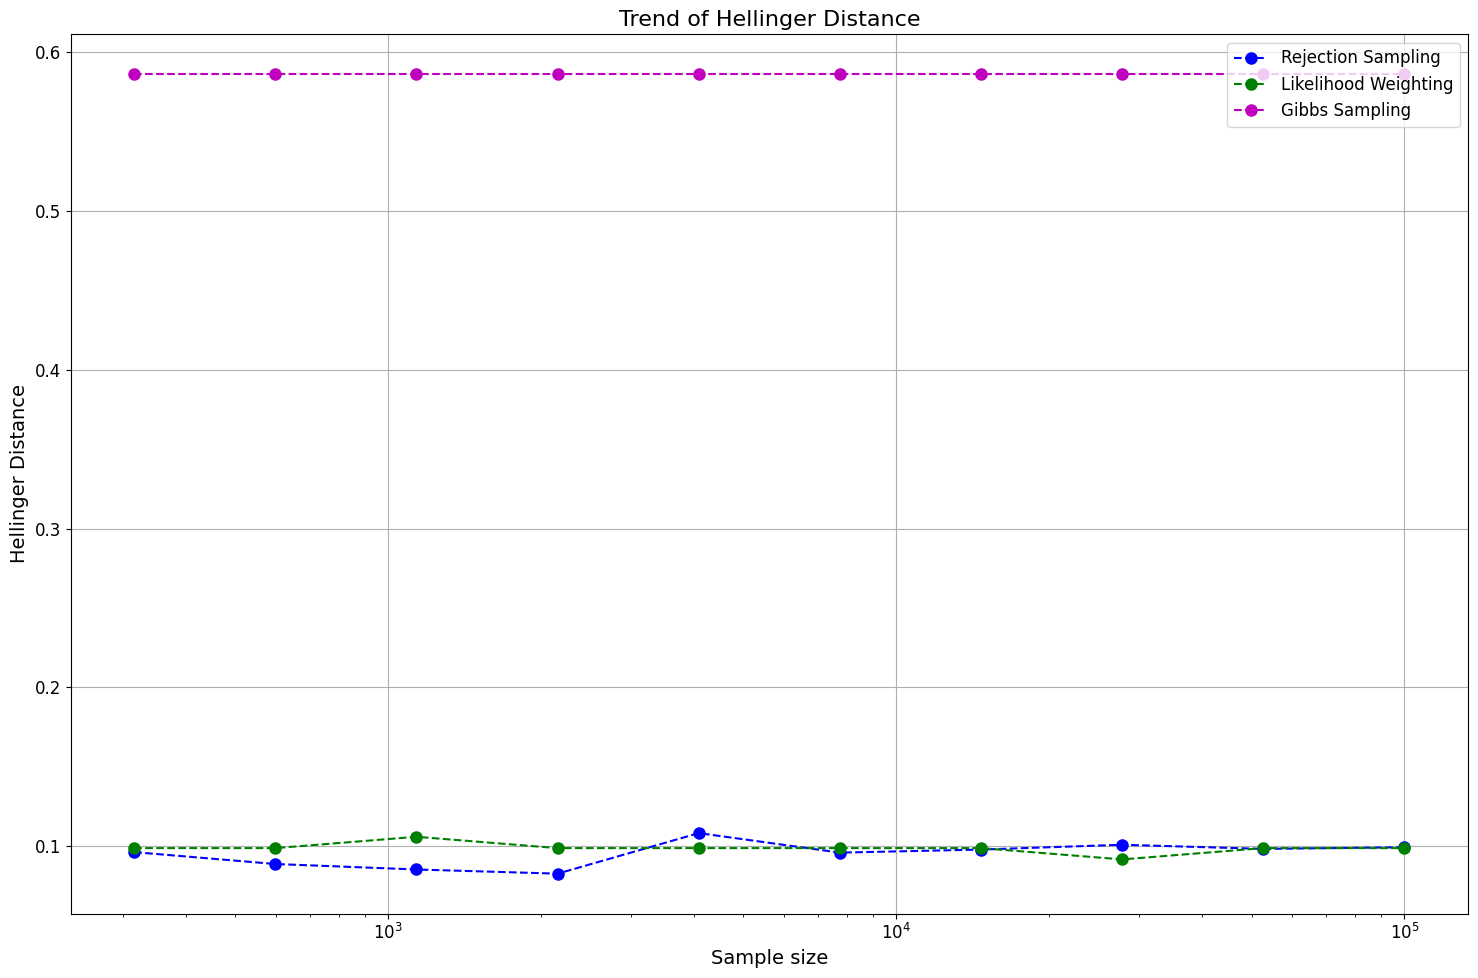

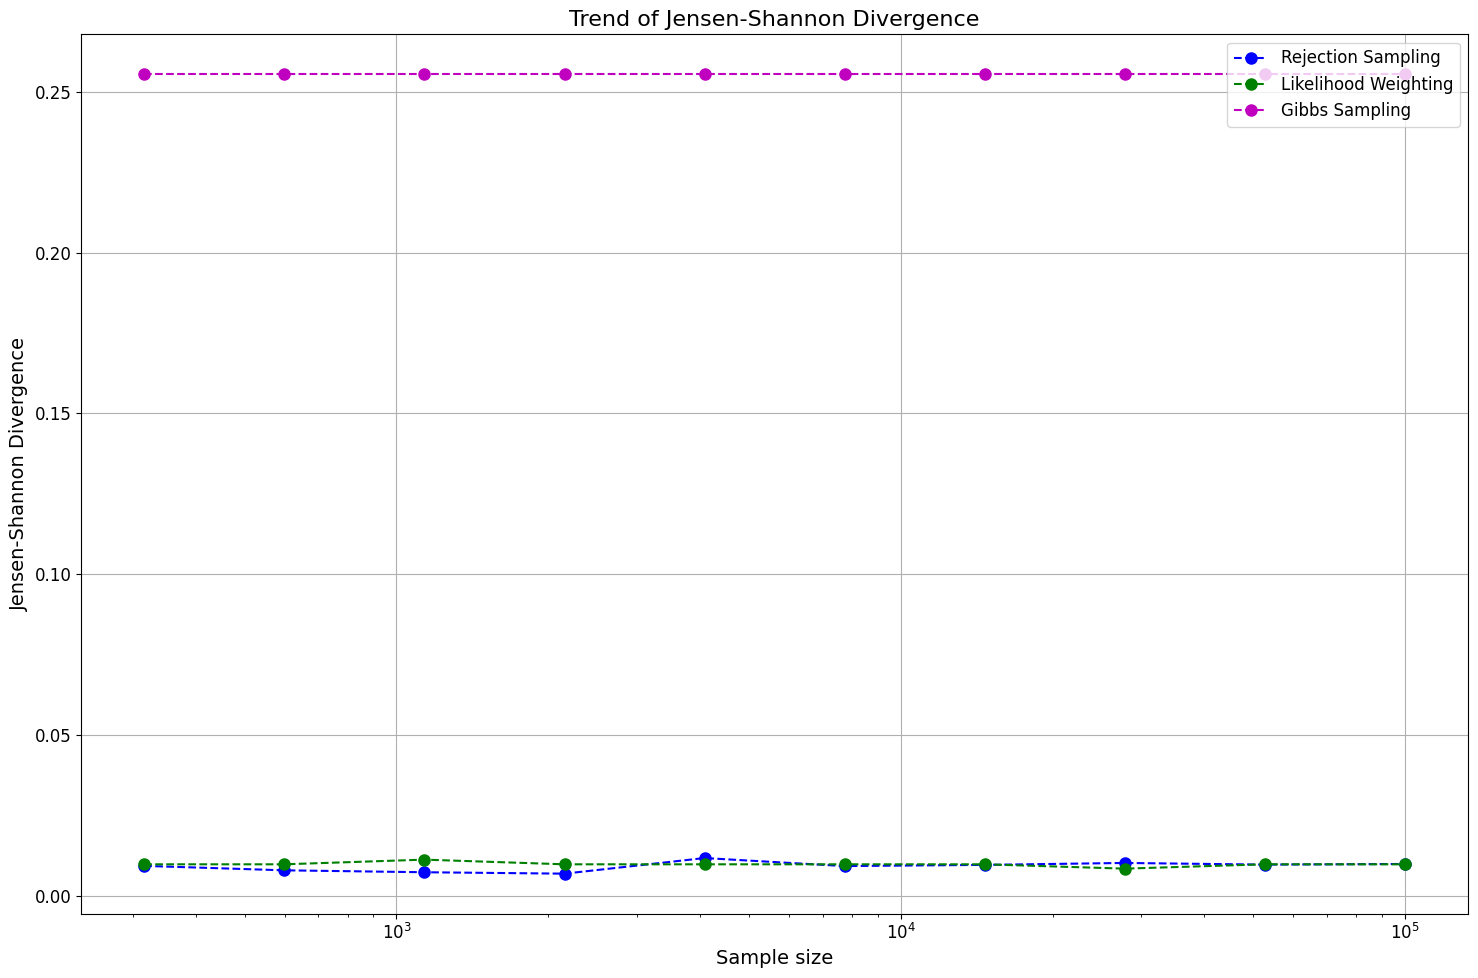

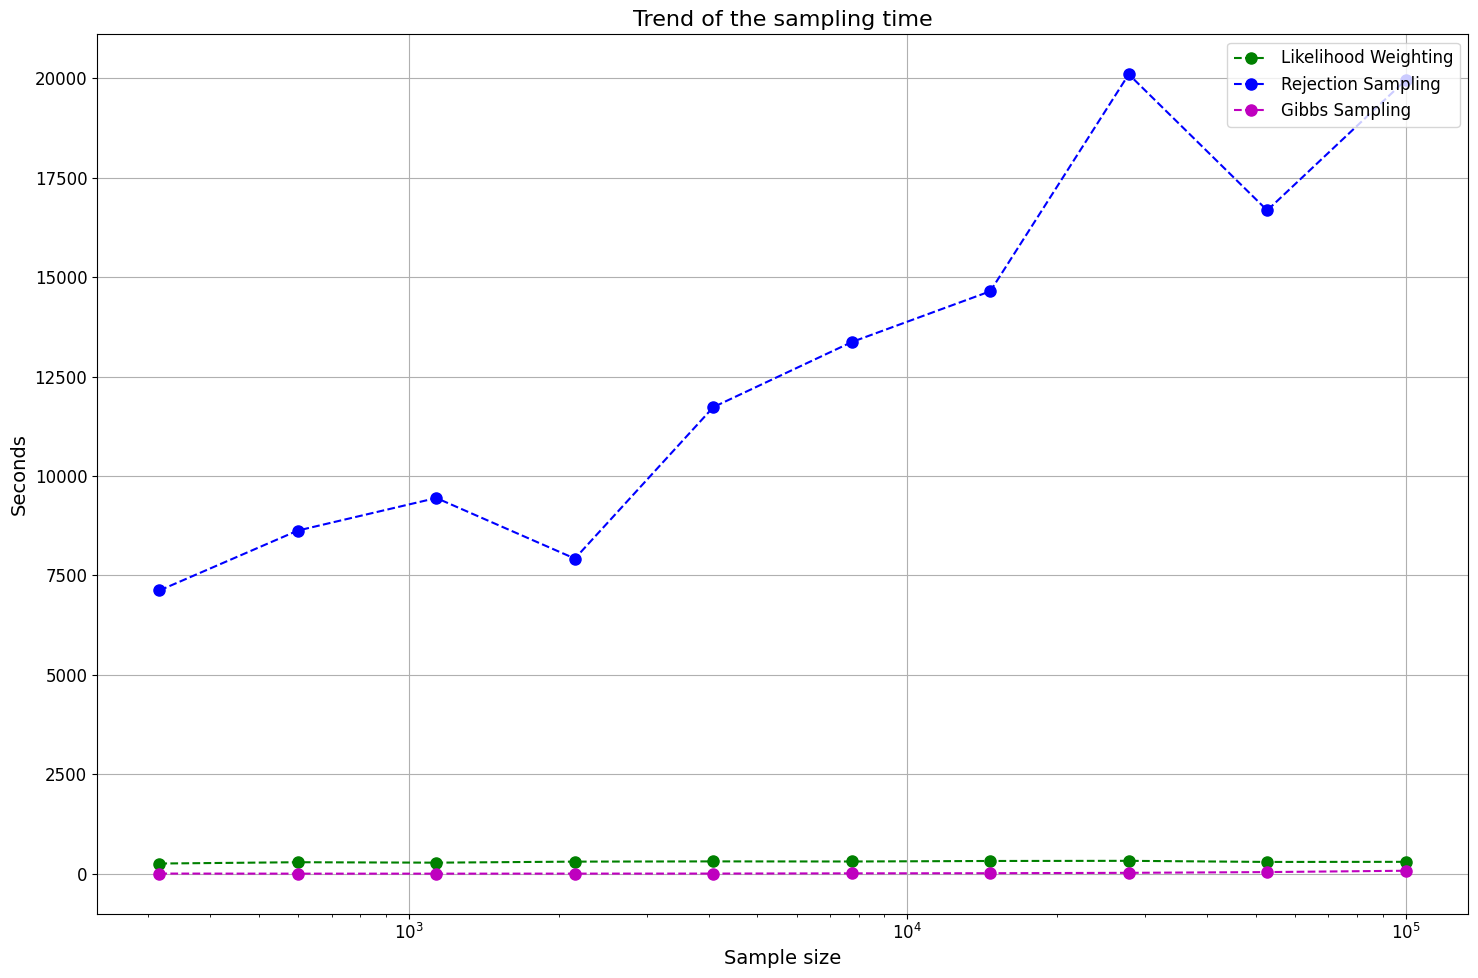

In [100]:
print("P(corona result| fever:True, cough:true)")

query_var = ['corona_result']
query_evidence = {'cough':1,'fever':1}
value=True
q=1
approximate_inference(q,query_var,query_evidence,value)

In [99]:
column_names = updated_df1.columns.tolist()
print(column_names)

['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result', 'age_60_and_above', 'gender', 'test_indication']
